# Business Optimize In Agriculture 

In [7]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd

# Image Analysis
## bands information

https://gisgeography.com/sentinel-2-bands-combinations/

similar gradient appearing in all bands

=> some normalization help like ndvi


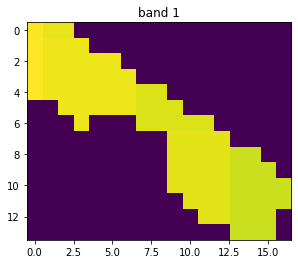

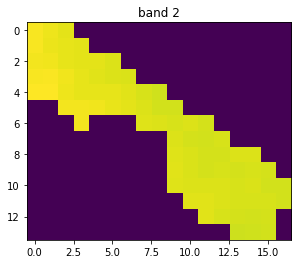

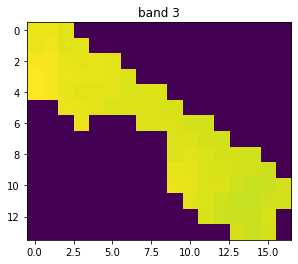

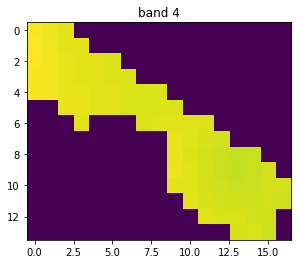

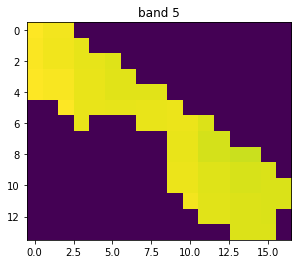

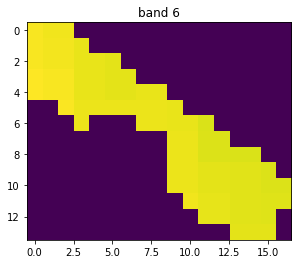

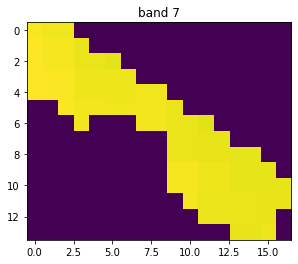

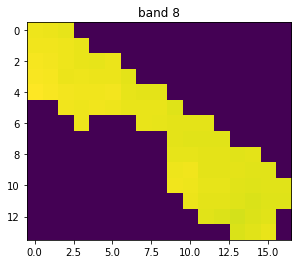

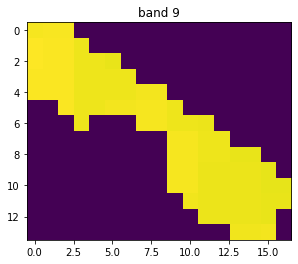

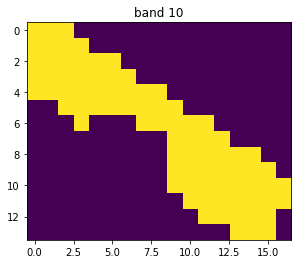

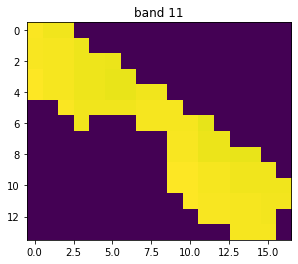

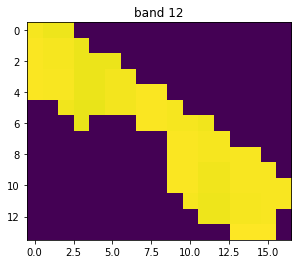

17
14


In [134]:
# fp = r'../raw_data/rice_1y/id_6094bb4df85c5e001b870910_all_bands_2021-01-05.tif'
# img = rasterio.open(fp)
# for i in range(1,13):
#     plt.title(f"band {i}")
#     show(img.read(i))

## NDVI

<ipython-input-135-e7272a2a2a10>:2: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (img.read(8)-img.read(4))/(img.read(8) + img.read(4))


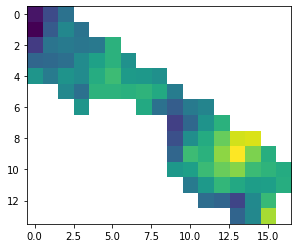

<AxesSubplot:>

In [135]:
# compute ndvi
# ndvi = (img.read(8)-img.read(4))/(img.read(8) + img.read(4))

# show(ndvi)

In [136]:
# ndvi_ = np.nan_to_num(ndvi, nan=-1)
# ndvi_values =np.array([x for x in ndvi_.flatten() if x != -1])
# ndvi_values.mean(),ndvi_values.var()

(0.0691602574223873, 5.0016452917297556e-05)

In [7]:
# ndvi_.flatten()

## moisture index

In [8]:
# # moisture index
# mi = (img.read(8)-img.read(11))/(img.read(8) + img.read(11))
# show(mi)

## Visualize Data Rice Fields

In [10]:
# fp = r'../raw_data/rice_1y/id_6094bb4df85c5e001b870910_all_bands_2021-01-05.tif'
# img = rasterio.open(fp)
# for i in range(1,13):
#     plt.title(f"band {i}")
#     show(img.read(i))

In [11]:
# img.count

In [12]:
# img.read(8)

In [13]:
# array = img.read()
# stats = []
# for band in array:
#     stats.append({
#           'min': band.min(),
#            'mean': band.mean(),
#            'median': np.median(band),
#          'max': band.max()})

In [15]:
# import matplotlib.pyplot as plt
# plt.hist(img.read().flatten(), alpha = 1)

In [16]:
# from rasterio.plot import show_hist
# show_hist(img, bins=50, lw=0.0, stacked=False, alpha=0.3,
#      histtype='stepfilled', title="Histogram")

In [17]:
# band4= img.read(4)

## Visualize SugarCane 

In [19]:
# fp = r'../raw_data/sugarcane/id_6054a1b558a7cd00480009c8_all_bands_2020-07-03.tif'
# sugar_cane = rasterio.open(fp)
# for i in range(1,13):
#     plt.title(f"band {i}")
#     show(sugar_cane.read(i))

In [20]:
# sugar_cane.count

In [21]:
# array = sugar_cane.read()
# stats = []
# for band in array:
#     stats.append({
#           'min': band.min(),
#            'mean': band.mean(),
#            'median': np.median(band),
#          'max': band.max()})
# stats

In [22]:
# sugar_cane.read(8).flatten()

In [23]:
# import matplotlib.pyplot as plt
# plt.hist(sugar_cane.read().flatten(), alpha = 1)

In [24]:
# from rasterio.plot import show_hist
# show_hist(sugar_cane, bins=50, lw=0.0, stacked=False, alpha=0.3,
#      histtype='stepfilled', title="Histogram")

# Master Dataset (Df)

In [141]:
import math
math.pow(9, 3)

In [165]:
def create_dataset(folders, n = None): 
    X = []
    y = []

    
    for folder in folders:
        files_s = glob.glob(f"../raw_data/{folder}/*all*.tif")
        if n is None:
            n = len(files_s)
        for file in files_s[:n]:
            filename = os.path.basename(f"../raw_data/{folder}/{file}")
            file_id, date = filename.split('_all_bands_')
            date = date.replace('.tif','')
    
            img = rasterio.open(file)
            # Compute ndvi mean, median, std
            ndvi = (img.read(8)-img.read(4))/(img.read(8) + img.read(4))
            ndvi_ = np.nan_to_num(ndvi, nan=-1)
            ndvi_values = np.array([x for x in ndvi_.flatten() if x != -1])
            ndvi_mean = ndvi_values.mean()
            ndvi_median = np.median(ndvi_values)
            ndvi_std = np.std(ndvi_values)
            
            # Compute mi mean, median, std
            mi = (img.read(8)-img.read(11))/(img.read(8) + img.read(11))
            mi_ = np.nan_to_num(mi, nan=-1)
            mi_values =np.array([x for x in mi_.flatten() if x != -1])
            mi_mean = mi_values.mean()
            mi_median = np.median(mi_values)
            mi_std = np.std(mi_values)
            
            # Compute Cb1 mean, median, std
            band_combo_1 = img.read(7) + img.read(6) + img.read(4)
            bc1_ = np.nan_to_num(band_combo_1, nan=-1)
            bc1_values =np.array([x for x in bc1_.flatten() if x != -1])
            bc1_mean = bc1_values.mean()
            bc1_median = np.median(bc1_values)
            bc1_std = np.std(bc1_values)
            
            # Compute Cb2 mean, median, std
            band_combo_2 = img.read(11) + img.read(8) + img.read(2)
            bc2_ = np.nan_to_num(band_combo_2, nan=-1)
            bc2_values =np.array([x for x in bc2_.flatten() if x != -1])
            bc2_mean= bc2_values.mean()
            bc2_median= np.median(bc2_values)
            bc2_std= np.std(bc2_values)
            
            # Compute Cb3 mean, median, std
            band_combo_3 = (img.read(3)-img.read(8))/(img.read(3)+img.read(8))
            bc3_ = np.nan_to_num(band_combo_3, nan=-1)
            bc3_values =np.array([x for x in bc3_.flatten() if x != -1])
            bc3_mean= bc3_values.mean()
            bc3_median= np.median(bc3_values)
            bc3_std= np.std(bc3_values)
            
            # Compute Cb4 mean, median, std
            band_combo_4 = img.read(12) + img.read(8) + img.read(4)
            bc4_ = np.nan_to_num(band_combo_4, nan=-1)
            bc4_values =np.array([x for x in bc4_.flatten() if x != -1])
            bc4_mean= bc4_values.mean()
            bc4_median= np.median(bc4_values)
            bc4_std= np.std(bc4_values)
            
            # Compute Cb5 mean, median, std
            band_combo_5 = img.read(4) + img.read(3) + img.read(2)
            bc5_ = np.nan_to_num(band_combo_5, nan=-1)
            bc5_values =np.array([x for x in bc5_.flatten() if x != -1])
            bc5_mean= bc5_values.mean()
            bc5_median= np.median(bc5_values)
            bc5_std= np.std(bc5_values)
            
            #Compute GNDVI
            band_combo_6 = (img.read(8) - img.read(3))/(img.read(8) + img.read(3))
            bc6_ = np.nan_to_num(band_combo_6, nan=-1)
            bc6_values =np.array([x for x in bc6_.flatten() if x != -1])
            bc6_mean= bc6_values.mean()
            bc6_median= np.median(bc6_values)
            bc6_std= np.std(bc6_values)
            
            #Compute EVI
#           EVI (Sentinel 2) = 2.5 * ((B8 – B4) / (B8 + 6 * B4 – 7.5 * B2 + 1))
# EVI (Sentinel 2) = 2.5 * ((B8 – B4) / (B8 + 6 * B4 – 7.5 * B2 + 1))
#             band_combo_7 = 2.5 *((img.read(8) - img.read(4))/(img.read(8)+6*img.read(4) - 7.5*img.read(2) + 1))
#             bc7_ = np.nan_to_num(band_combo_7, nan=-1)
#             bc7_values =np.array([x for x in bc7_.flatten() if x != -1])
#             bc7_mean= bc7_values.mean()
#             bc7_median= np.median(bc7_values)
#             bc7_std= np.std(bc7_values)
            
            #Compute AVI 
#           AVI (Sentinel 2) = [B8 * (1 – B4)*(B8 – B4)] 1/3
            band_combo_8 = (img.read(8) * (1 - img.read(4))*(img.read(8) - img.read(4)))**(1/3)
            bc8_ = np.nan_to_num(band_combo_8, nan=-1)
            bc8_values =np.array([x for x in bc8_.flatten() if x != -1])
            bc8_mean= bc8_values.mean()
            bc8_median= np.median(bc8_values)
            bc8_std= np.std(bc8_values)
            
            #Compute SAVI
#           SAVI (Sentinel 2) = (B08 – B04) / (B08 + B04 + 0.428) * (1.428)
            band_combo_9 = (img.read(8) - img.read(4)) / (img.read(8) + img.read(4) + 0.428) * (1.428)
            bc9_ = np.nan_to_num(band_combo_9, nan=-1)
            bc9_values =np.array([x for x in bc9_.flatten() if x != -1])
            bc9_mean= bc9_values.mean()
            bc9_median= np.median(bc9_values)
            bc9_std= np.std(bc9_values)
                            
            # Compute Cb10 mean, median, 
#            NDMI (Sentinel 2) = (B8 – B11) / (B8 + B11)
            band_combo_10 = (img.read(8)-img.read(11)) / (img.read(8)+img.read(11))
            bc10_ = np.nan_to_num(band_combo_10, nan=-1)
            bc10_values =np.array([x for x in bc10_.flatten() if x != -1])
            bc10_mean= bc10_values.mean()
            bc10_median= np.median(bc10_values)
            bc10_std= np.std(bc10_values)
                            
            # Compute Cb11 mean, median, std
#             MSI (Sentinel 2) = B11 / B08
                            
            band_combo_11 = img.read(11) / img.read(8)
            bc11_ = np.nan_to_num(band_combo_11, nan=-1)
            bc11_values =np.array([x for x in bc11_.flatten() if x != -1])
            bc11_mean= bc11_values.mean()
            bc11_median= np.median(bc11_values)
            bc11_std= np.std(bc11_values)
                            
            # Compute Cb12 mean, median, std
#             GCI (Sentinel 2) = (B9 / B3) -1

            band_combo_12 = (img.read(9) / img.read(3)) -1
            bc12_ = np.nan_to_num(band_combo_12, nan=-1)
            bc12_values =np.array([x for x in bc12_.flatten() if x != -1])
            bc12_mean= bc12_values.mean()
            bc12_median= np.median(bc12_values)
            bc12_std= np.std(bc12_values)
                            
            # Compute Cb13 mean, median, std
#             NBRI (Sentinel 2) = (B8 – B12) / (B8 + B12)
                            
            band_combo_13 = (img.read(8)-img.read(12))/(img.read(8)+img.read(12))
            bc13_ = np.nan_to_num(band_combo_13, nan=-1)
            bc13_values =np.array([x for x in bc13_.flatten() if x != -1])
            bc13_mean= bc13_values.mean()
            bc13_median= np.median(bc13_values)
            bc13_std= np.std(bc13_values)

            # Compute BSI mean, median, std             
            band_combo_14 = \
            ((img.read(11) + img.read(4)) - (img.read(8) + img.read(2))) / \
            ((img.read(11) + img.read(4)) + (img.read(8) + img.read(2)))
            bc14_ = np.nan_to_num(band_combo_14, nan=-1) 
            bc14_values =np.array([x for x in bc14_.flatten() if x != -1]) 
            bc14_mean= bc14_values.mean() 
            bc14_median= np.median(bc14_values) 
            bc14_std= np.std(bc14_values) 

            # Compute NWDI mean, median, std 
            band_combo_15 =  (img.read(3) - img.read(8)) / (img.read(3) + img.read(8)) 
            bc15_ = np.nan_to_num(band_combo_15, nan=-1) 
            bc15_values =np.array([x for x in bc15_.flatten() if x != -1]) 
            bc15_mean= bc15_values.mean() 
            bc15_median= np.median(bc15_values) 
            bc15_std= np.std(bc15_values) 

            # Compute NDSI mean, median, std 
            band_combo_16 =  (img.read(3) - img.read(11)) / (img.read(3) + img.read(11)) 
            bc16_ = np.nan_to_num(band_combo_16, nan=-1) 
            bc16_values =np.array([x for x in bc16_.flatten() if x != -1]) 
            bc16_mean= bc16_values.mean() 
            bc16_median= np.median(bc16_values) 
            bc16_std= np.std(bc16_values) 

            # Compute NDGI mean, median, std 
            band_combo_17 =  (img.read(3) - img.read(4)) / (img.read(3) + img.read(4)) 
            bc17_ = np.nan_to_num(band_combo_17, nan=-1) 
            bc17_values =np.array([x for x in bc17_.flatten() if x != -1]) 
            bc17_mean= bc17_values.mean() 
            bc17_median= np.median(bc17_values) 
            bc17_std= np.std(bc17_values) 

            #Feature Dictionary
            b_dict = {'date':date,'file_id':file_id,'target': folder,\
                      'ndvi_mean': ndvi_mean,'ndvi_median': ndvi_median,'ndvi_std': ndvi_std,\
                      'mi_mean': mi_mean,'mi_median': mi_median,'mi_std': mi_std,\
                      'bc1_mean': bc1_mean,'bc1_median': bc1_median,'bc1_std': bc1_std,\
                      'bc2_mean': bc2_mean,'bc2_median': bc2_median,'bc2_std': bc2_std,\
                      'bc3_mean': bc3_mean,'bc3_median': bc3_median,'bc3_std': bc3_std,\
                      'bc4_mean': bc4_mean,'bc4_median': bc4_median,'bc4_std': bc4_std,\
                      'bc5_mean': bc5_mean,'bc5_median': bc5_median,'bc5_std': bc5_std,\
                       'bc6_mean': bc6_mean,'bc6_median': bc6_median,'bc6_std': bc6_std,\
#                        'bc7_mean': bc7_mean,'bc7_median': bc7_median,'bc7_std': bc7_std,\
                       'bc8_mean': bc8_mean,'bc8_median': bc8_median,'bc8_std': bc8_std,\
                       'bc9_mean': bc9_mean,'bc9_median': bc9_median,'bc9_std': bc9_std,\
                       'bc10_mean': bc10_mean,'bc10_median': bc10_median,'bc10_std': bc10_std,\
                       'bc11_mean': bc11_mean,'bc11_median': bc11_median,'bc11_std': bc11_std,\
                       'bc12_mean': bc12_mean,'bc12_median': bc12_median,'bc12_std': bc12_std,\
                       'bc13_mean': bc13_mean,'bc13_median': bc13_median,'bc13_std': bc13_std,\
                       'bc14_mean': bc14_mean,'bc14_median': bc14_median,'bc14_std': bc14_std,\
                       'bc15_mean': bc15_mean,'bc15_median': bc15_median,'bc15_std': bc15_std,\
                       'bc16_mean': bc16_mean,'bc16_median': bc16_median,'bc16_std': bc16_std,\
                       'bc17_mean': bc17_mean,'bc17_median': bc17_median,'bc17_std': bc17_std
                    
                    }
            
#             for band in range(1,13):
#               b_dict[f'b{band}'] = img.read(band).flatten()
#                 b_dict[f'b{band}_mean'] = img.read(band).flatten().mean()
#                 b_dict[f'b{band}_median'] = np.median(img.read(band).flatten())
#                 b_dict[f'b{band}_std'] = np.std(img.read(band).flatten())
            X.append(b_dict)      
            img.close()
    df = pd.DataFrame(X)
    
    #Add month columns, sort by month
    df['month'] = pd.DatetimeIndex(df['date']).month
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
    df = df.sort_values(by=['month'])
    
    return df

In [166]:
folders = ['rice_1y', 'sugarcane']
df = create_dataset(folders) 
df.head()

<ipython-input-165-9987dd35c886>:17: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (img.read(8)-img.read(4))/(img.read(8) + img.read(4))
<ipython-input-165-9987dd35c886>:25: RuntimeWarning: invalid value encountered in true_divide
  mi = (img.read(8)-img.read(11))/(img.read(8) + img.read(11))
<ipython-input-165-9987dd35c886>:49: RuntimeWarning: invalid value encountered in true_divide
  band_combo_3 = (img.read(3)-img.read(8))/(img.read(3)+img.read(8))
<ipython-input-165-9987dd35c886>:73: RuntimeWarning: invalid value encountered in true_divide
  band_combo_6 = (img.read(8) - img.read(3))/(img.read(8) + img.read(3))
<ipython-input-165-9987dd35c886>:110: RuntimeWarning: invalid value encountered in true_divide
  band_combo_10 = (img.read(8)-img.read(11)) / (img.read(8)+img.read(11))
<ipython-input-165-9987dd35c886>:120: RuntimeWarning: invalid value encountered in true_divide
  band_combo_11 = img.read(11) / img.read(8)
<ipython-input-165-9987dd35c886>:130: RuntimeWa

,date,file_id,target,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_median,mi_std,bc1_mean,...,bc15_mean,bc15_median,bc15_std,bc16_mean,bc16_median,bc16_std,bc17_mean,bc17_median,bc17_std,month
886,2021-01-10,id_6094f75af85c5e001b870a52,rice_1y,0.720450,0.726511,0.025422,0.338732,0.342153,0.018440,4806.410884,...,11.469805,11.400586,0.556457,20.079914,20.146697,0.291681,0.190794,0.192612,0.015590,1
1416,2021-01-05,id_60a09545f85c5e001b8714ba,rice_1y,0.050890,0.050000,0.006207,0.258570,0.259185,0.007349,5254.888889,...,4.993869,5.027701,0.180740,0.248578,0.248026,0.008103,0.040238,0.040382,0.005012,1
407,2021-01-10,id_60a098fbf85c5e001b8714db,rice_1y,0.385632,0.378166,0.042201,0.245925,0.251608,0.032063,969.441198,...,25.687715,26.136638,1.622138,31.874617,34.526121,9.549258,0.103870,0.101010,0.023376,1
2078,2021-01-24,Name_5f2a51ce868954001c94d1f4,sugarcane,0.194315,0.182281,0.035539,10.616879,10.010155,1.769372,4565.833333,...,18.085678,17.032839,3.015635,12.857279,12.100346,2.226670,23.371643,21.679095,4.255678,1
1423,2021-01-20,id_6094c0dcf85c5e001b870958,rice_1y,0.919154,0.926241,0.029616,0.437778,0.442913,0.021909,4875.832817,...,14.379265,14.247757,0.846592,33.579348,33.546590,2.318592,0.412541,0.428571,0.069055,1


In [ ]:
df

In [80]:
df.head(50)

,date,file_id,target,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_median,mi_std,bc1_mean,...,b10_mean,b10_median,b10_std,b11_mean,b11_median,b11_std,b12_mean,b12_median,b12_std,month
653,2021-01-15,id_6094f6fdf85c5e001b870a4f,rice_1y,0.295675,0.281454,0.080893,0.158271,0.158295,0.027730,8213.009524,...,4744.514286,6881.0,3732.597920,2391.038095,3566.0,1878.866786,1999.609524,2838.0,1584.696807,1
1546,2021-01-25,id_6094f7b0f85c5e001b870a58,rice_1y,0.656829,0.667714,0.046713,0.354806,0.361879,0.043257,6676.743056,...,3568.576389,5093.0,2413.132564,1567.638889,2094.0,1082.670083,907.763889,1136.0,658.523032,1
1545,2021-01-25,id_6094bb4df85c5e001b870910,rice_1y,0.309981,0.309735,0.028584,0.127613,0.125022,0.013014,5269.424370,...,2437.781513,0.0,3334.151307,1649.823529,0.0,2259.372987,1302.252101,0.0,1786.357522,1
240,2021-01-20,id_60a09545f85c5e001b8714ba,rice_1y,0.827729,0.842331,0.055862,0.301057,0.308356,0.029995,2246.037037,...,1185.247942,0.0,1941.340933,615.713992,0.0,1006.606055,326.455761,0.0,534.038640,1
1670,2021-01-11,id_6054a1b458a7cd004800099b,sugarcane,0.195067,0.197706,0.013086,7.817968,7.604596,0.479634,6896.621212,...,2926.340909,3430.0,1365.079895,3996.098485,4879.0,1852.417294,2934.159091,3559.0,1349.812949,1
971,2021-01-05,id_609debbbf85c5e001b871229,rice_1y,0.047076,0.048994,0.010923,0.248638,0.249979,0.011605,14488.531250,...,9791.223214,15893.0,7729.415147,2983.897321,4753.0,2356.894270,2302.763393,3615.0,1819.515777,1
2625,2021-01-14,id_6054a1b458a7cd004800099b,sugarcane,0.207646,0.210604,0.011176,8.275605,7.999501,0.878587,6229.287879,...,2534.613636,2719.0,1227.148330,3847.136364,4700.0,1810.319308,2866.515152,3510.0,1333.748855,1
1544,2021-01-20,id_609dd39af85c5e001b8711bf,rice_1y,0.950066,0.965237,0.045888,0.445757,0.457345,0.036155,2479.836735,...,1462.132653,2285.0,1116.142598,530.964286,827.0,404.761600,266.892857,410.5,203.807592,1
790,2021-01-15,id_60a091c6f85c5e001b871494,rice_1y,0.785169,0.798416,0.039349,0.445265,0.442367,0.033129,2432.376068,...,1217.786325,1670.0,741.029347,473.888889,640.0,288.433872,227.692308,307.0,138.034027,1
487,2021-01-25,id_6094f75af85c5e001b870a52,rice_1y,0.331633,0.256168,0.161240,0.169159,0.122773,0.085146,8087.427211,...,3660.730612,5678.0,3418.636834,2397.182313,2547.0,2368.433531,1883.238095,1523.0,1967.219962,1


# Data Visualization (Df2)

In [168]:
df2 = df.copy()
df2

,date,file_id,target,ndvi_mean,ndvi_median,ndvi_std,mi_mean,mi_median,mi_std,bc1_mean,...,bc15_mean,bc15_median,bc15_std,bc16_mean,bc16_median,bc16_std,bc17_mean,bc17_median,bc17_std,month
886,2021-01-10,id_6094f75af85c5e001b870a52,rice_1y,0.720450,0.726511,0.025422,0.338732,0.342153,0.018440,4806.410884,...,11.469805,11.400586,0.556457,20.079914,20.146697,0.291681,0.190794,0.192612,0.015590,1
1416,2021-01-05,id_60a09545f85c5e001b8714ba,rice_1y,0.050890,0.050000,0.006207,0.258570,0.259185,0.007349,5254.888889,...,4.993869,5.027701,0.180740,0.248578,0.248026,0.008103,0.040238,0.040382,0.005012,1
407,2021-01-10,id_60a098fbf85c5e001b8714db,rice_1y,0.385632,0.378166,0.042201,0.245925,0.251608,0.032063,969.441198,...,25.687715,26.136638,1.622138,31.874617,34.526121,9.549258,0.103870,0.101010,0.023376,1
2078,2021-01-24,Name_5f2a51ce868954001c94d1f4,sugarcane,0.194315,0.182281,0.035539,10.616879,10.010155,1.769372,4565.833333,...,18.085678,17.032839,3.015635,12.857279,12.100346,2.226670,23.371643,21.679095,4.255678,1
1423,2021-01-20,id_6094c0dcf85c5e001b870958,rice_1y,0.919154,0.926241,0.029616,0.437778,0.442913,0.021909,4875.832817,...,14.379265,14.247757,0.846592,33.579348,33.546590,2.318592,0.412541,0.428571,0.069055,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,2020-12-07,id_6054a1b558a7cd00480009ec,sugarcane,0.672655,0.684995,0.080203,0.667675,0.168643,2.538696,5146.516068,...,16.362797,16.161983,1.355290,21.324231,21.379173,1.295597,2.695587,0.153897,9.564259,12
1099,2020-12-21,id_6094f75af85c5e001b870a52,rice_1y,0.824591,0.843045,0.047882,0.278297,0.285026,0.027774,3693.321088,...,15.699380,15.616999,1.306329,25.223561,25.387910,1.303736,0.355250,0.375192,0.059422,12
310,2020-12-31,id_6094bc2cf85c5e001b870918,rice_1y,0.667244,0.667627,0.045040,0.258016,0.260745,0.018642,7020.150588,...,11.441567,11.302460,0.573300,17.309559,17.199143,0.675432,0.171341,0.172805,0.041752,12
2768,2020-12-20,id_6054a1b458a7cd0048000992,sugarcane,0.575426,0.624187,0.104442,0.342403,0.227568,1.265805,4721.607143,...,15.932437,15.624006,1.588508,21.902515,22.240792,2.786202,2.807577,0.112901,7.877306,12


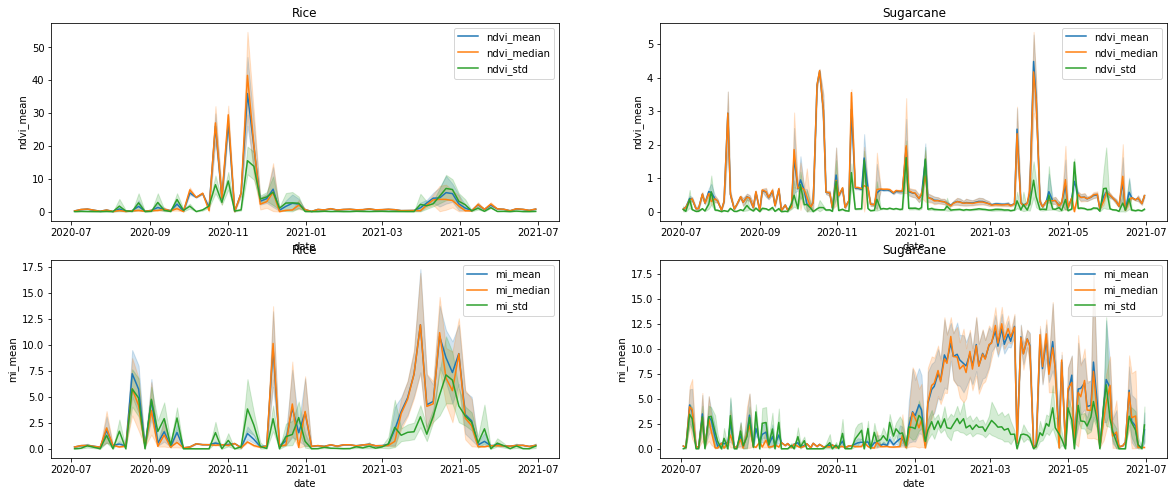

In [140]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

sugarcane = df2[df2['target']=='sugarcane']
rice = df2[df2['target']== 'rice_1y']

plt.figure(figsize=(20,8))

# Ndvi Visualization
# Rice
plt.subplot(2, 2, 1)
sns.lineplot(x = "date", y = "ndvi_mean", data = rice, palette = 'blue',label = 'ndvi_mean')
sns.lineplot(x = "date", y = "ndvi_median", data = rice,palette = 'orange',label = 'ndvi_median')
sns.lineplot(x = "date", y = "ndvi_std", data = rice,palette = 'green',label = 'ndvi_std')
plt.title('Rice')
# Sugarcane
plt.subplot(2, 2, 2)
sns.lineplot(x = "date", y = "ndvi_mean", data = sugarcane, palette = 'blue',label = 'ndvi_mean')
sns.lineplot(x = "date", y = "ndvi_median", data = sugarcane,palette = 'orange',label = 'ndvi_median')
sns.lineplot(x = "date", y = "ndvi_std", data = sugarcane,palette = 'green',label = 'ndvi_std')
plt.title('Sugarcane')

# mi Visualization
# Rice
plt.subplot(2, 2, 3)
sns.lineplot(x = "date", y = "mi_mean", data = rice, palette = 'blue',label = 'mi_mean')
sns.lineplot(x = "date", y = "mi_median", data = rice,palette = 'orange',label = 'mi_median')
sns.lineplot(x = "date", y = "mi_std", data = rice,palette = 'green',label = 'mi_std')
plt.title('Rice')
# Sugarcane
plt.subplot(2, 2, 4)
sns.lineplot(x = "date", y = "mi_mean", data = sugarcane, palette = 'blue',label = 'mi_mean')
sns.lineplot(x = "date", y = "mi_median", data = sugarcane,palette = 'orange',label = 'mi_median')
sns.lineplot(x = "date", y = "mi_std", data = sugarcane,palette = 'green',label = 'mi_std')
plt.title('Sugarcane')

# Cb1 Visualization

# sns.lineplot(x = "date", y = "Cb1_mean", data = rice, hue = 'target')
# sns.lineplot(x = "date", y = "Cb1_median", data = rice)
# sns.lineplot(x = "date", y = "Cb1_std", data = rice)

# sns.lineplot(x = "date", y = "Cb1_mean", data = sugarcane, hue = 'target')
# sns.lineplot(x = "date", y = "Cb1_median", data = sugarcane)
# sns.lineplot(x = "date", y = "Cb1_std", data = sugarcane)


# Cb2 Visualization

# sns.lineplot(x = "date", y = "Cb2_mean", data = rice, hue = 'target')
# sns.lineplot(x = "date", y = "Cb2_median", data = rice)
# sns.lineplot(x = "date", y = "Cb2_std", data = rice)

# sns.lineplot(x = "date", y = "Cb2_mean", data = sugarcane, hue = 'target')
# sns.lineplot(x = "date", y = "Cb2_median", data = sugarcane)
# sns.lineplot(x = "date", y = "Cb2_std", data = sugarcane)


# plt.ylabel("Col_1 and Col_2")
# plt.xticks(rotation = 25)
plt.legend()


In [92]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3312 entries, 653 to 2737
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3312 non-null   datetime64[ns]
 1   file_id      3312 non-null   object        
 2   target       3312 non-null   object        
 3   ndvi_mean    3312 non-null   float64       
 4   ndvi_median  3312 non-null   float64       
 5   ndvi_std     3312 non-null   float64       
 6   mi_mean      3312 non-null   float64       
 7   mi_median    3312 non-null   float64       
 8   mi_std       3312 non-null   float64       
 9   bc1_mean     3312 non-null   float64       
 10  bc1_median   3312 non-null   float64       
 11  bc1_std      3312 non-null   float64       
 12  bc2_mean     3312 non-null   float64       
 13  bc2_median   3312 non-null   float64       
 14  bc2_std      3312 non-null   float64       
 15  bc3_mean     3312 non-null   float64       
 16  bc3_

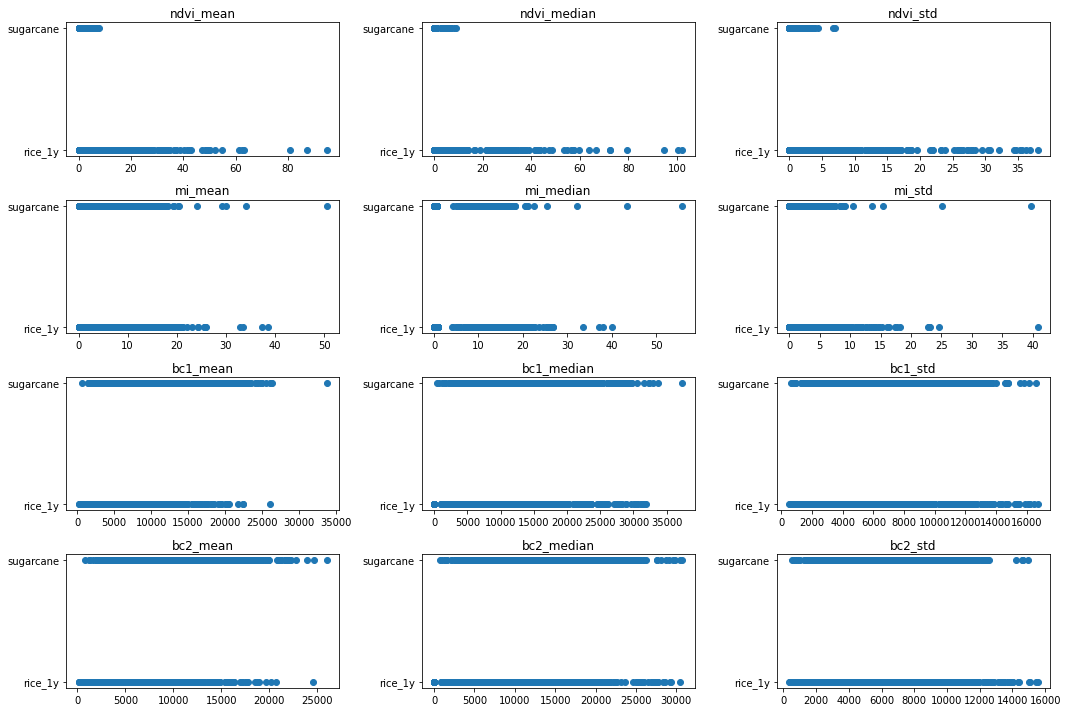

In [97]:
X = df2.drop(columns=['target','date','month','file_id'])
y = df2['target']

fig, ax = plt.subplots(4, 3, figsize=(15,10), tight_layout=True, )

#Ndvi
ax[0,0].scatter(X.ndvi_mean, y)
ax[0,0].set_title('ndvi_mean')
ax[0,1].scatter(X.ndvi_median, y)
ax[0,1].set_title('ndvi_median')
ax[0,2].scatter(X.ndvi_std, y)
ax[0,2].set_title('ndvi_std')

#mi
ax[1,0].scatter(X.mi_mean, y)
ax[1,0].set_title('mi_mean')
ax[1,1].scatter(X.mi_median, y)
ax[1,1].set_title('mi_median')
ax[1,2].scatter(X.mi_std, y)
ax[1,2].set_title('mi_std')

#Cb1
ax[2,0].scatter(X.bc1_mean, y)
ax[2,0].set_title('bc1_mean')
ax[2,1].scatter(X.bc1_median, y)
ax[2,1].set_title('bc1_median')
ax[2,2].scatter(X.bc1_std, y)
ax[2,2].set_title('bc1_std')

#Cb2
ax[3,0].scatter(X.bc2_mean, y)
ax[3,0].set_title('bc2_mean')
ax[3,1].scatter(X.bc2_median, y)
ax[3,1].set_title('bc2_median')
ax[3,2].scatter(X.bc2_std, y)
ax[3,2].set_title('bc2_std')


plt.show()

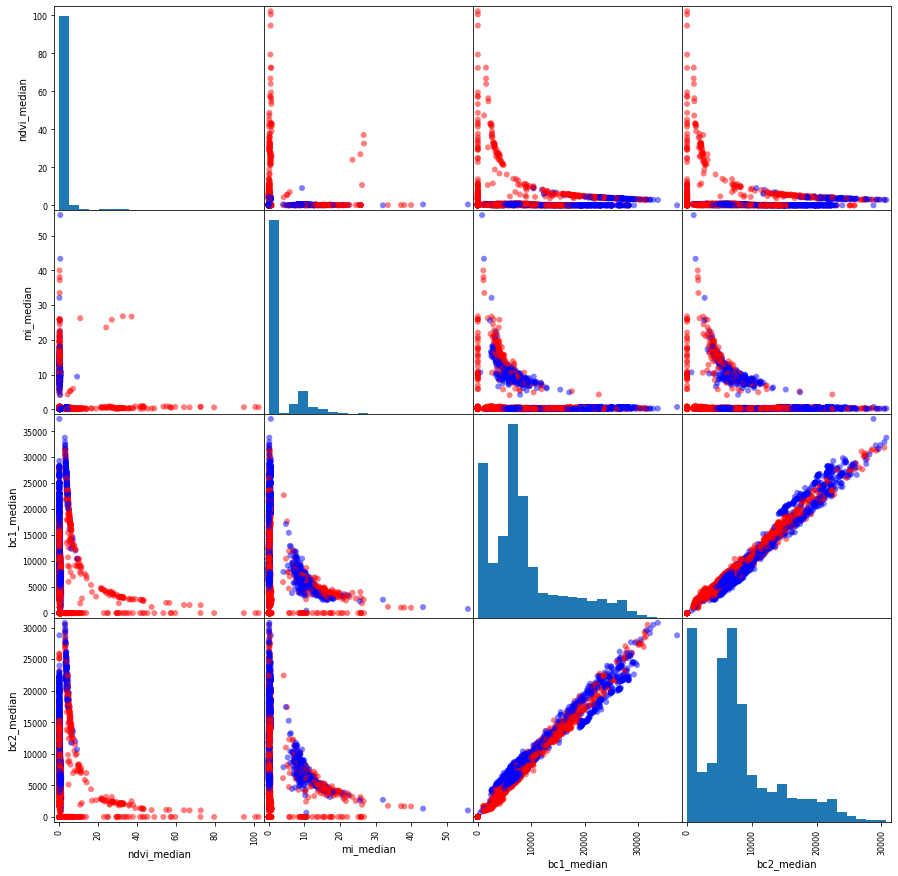

In [98]:
X = df.drop(columns='target')
y = df['target']
pd.plotting.scatter_matrix(X.iloc[:,[3,6,9,12]], alpha=0.5, color=['blue' if t == 'sugarcane' else 'red' for t in y], figsize=(15,15), marker='o', hist_kwds={'bins':20});

# Baseline Model
- Cross-validation

In [151]:
df2.isnull().values.any()

False

In [155]:
 df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3312 entries, 886 to 1774
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3312 non-null   datetime64[ns]
 1   file_id      3312 non-null   object        
 2   target       3312 non-null   object        
 3   ndvi_mean    3312 non-null   float64       
 4   ndvi_median  3312 non-null   float64       
 5   ndvi_std     3312 non-null   float64       
 6   mi_mean      3312 non-null   float64       
 7   mi_median    3312 non-null   float64       
 8   mi_std       3312 non-null   float64       
 9   bc1_mean     3312 non-null   float64       
 10  bc1_median   3312 non-null   float64       
 11  bc1_std      3312 non-null   float64       
 12  bc2_mean     3312 non-null   float64       
 13  bc2_median   3312 non-null   float64       
 14  bc2_std      3312 non-null   float64       
 15  bc3_mean     3312 non-null   float64       
 16  bc3_

In [169]:
#Cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=2000000)
X = df2.drop(columns=['target','date','file_id','month'])
y = df2['target']

scores = cross_val_score(logreg, X, y, cv=5)
scores.mean()
# logreg.fit(X,y)

/Users/Pinku/.pyenv/versions/3.8.6/envs/business_opt_in_agriculture/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Pinku/.pyenv/versions/3.8.6/envs/business_opt_in_agriculture/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation

0.7847247474402265

In [161]:
y.isna().sum()

0

In [162]:
X.max()

ndvi_mean      9.501042e+01
ndvi_median    1.022269e+02
ndvi_std       3.804133e+01
mi_mean        5.061566e+01
mi_median      5.590364e+01
mi_std         4.084379e+01
bc1_mean       3.383235e+04
bc1_median     3.735950e+04
bc1_std        1.671498e+04
bc2_mean       2.605313e+04
bc2_median     3.043650e+04
bc2_std        1.554297e+04
bc3_mean       9.935304e+01
bc3_median     1.073109e+02
bc3_std        1.191699e+02
bc4_mean       2.615692e+04
bc4_median     2.886550e+04
bc4_std        1.440972e+04
bc5_mean       3.526456e+04
bc5_median     3.891200e+04
bc5_std        1.795563e+04
bc6_mean       8.167647e+01
bc6_median     8.596179e+01
bc6_std        3.852436e+01
bc7_mean                inf
bc7_median     4.468057e+02
bc7_std                 inf
bc8_mean       2.932786e+01
bc8_median     3.385870e+01
bc8_std        1.683459e+01
bc9_mean       5.145690e+01
bc9_median     7.931742e+01
bc9_std        6.614233e+01
bc10_mean      5.061566e+01
bc10_median    5.590364e+01
bc10_std       4.084

In [159]:
X.isna().sum()

ndvi_mean      0
ndvi_median    0
ndvi_std       0
mi_mean        0
mi_median      0
mi_std         0
bc1_mean       0
bc1_median     0
bc1_std        0
bc2_mean       0
bc2_median     0
bc2_std        0
bc3_mean       0
bc3_median     0
bc3_std        0
bc4_mean       0
bc4_median     0
bc4_std        0
bc5_mean       0
bc5_median     0
bc5_std        0
bc6_mean       0
bc6_median     0
bc6_std        0
bc7_mean       0
bc7_median     0
bc7_std        0
bc8_mean       0
bc8_median     0
bc8_std        0
bc9_mean       0
bc9_median     0
bc9_std        0
bc10_mean      0
bc10_median    0
bc10_std       0
bc11_mean      0
bc11_median    0
bc11_std       0
bc12_mean      0
bc12_median    0
bc12_std       0
bc13_mean      0
bc13_median    0
bc13_std       0
bc14_mean      0
bc14_median    0
bc14_std       0
bc15_mean      0
bc15_median    0
bc15_std       0
bc16_mean      0
bc16_median    0
bc16_std       0
bc17_mean      0
bc17_median    0
bc17_std       0
dtype: int64

# Learning Curve

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn import datasets
import matplotlib.pyplot as plt

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((2318, 57), (994, 57), (2318,), (994,))

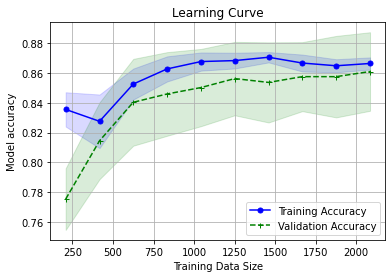

In [104]:
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', solver='lbfgs', random_state=1, max_iter=10000))
#
# Use learning curve to get training and test scores along with train sizes
#
train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)

#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Prevent Data Leaking
- Split into train and test data by file_id

In [105]:
# number of unique: rice vs. sugarcane
len(df2[df2['target']== 'rice_1y']['file_id'].unique()) , len(df2[df2['target']== 'sugarcane']['file_id'].unique())

(23, 35)

In [108]:
import numpy as np
from sklearn.model_selection import GroupShuffleSplit
train_inds, test_inds = next(GroupShuffleSplit(test_size=.20, n_splits=2, random_state = 7).split(df2, groups=df2['file_id']))
train = df2.iloc[train_inds]
test = df2.iloc[test_inds]

In [110]:
# Double Check if there is any duplicate file_id 
A = train.file_id.unique()
B = test.file_id.unique()
bool(set(A).intersection(B))

False

# Learning curve w/o data leak

In [112]:
# Cross-val
X_train = train.drop(columns = ['target','month', 'date','file_id'])
y_train= train['target']
logreg = LogisticRegression(max_iter=500000000000000)
scores = cross_val_score(logreg, X_train, y_train, cv=5)
scores.mean()

/Users/Pinku/.pyenv/versions/3.8.6/envs/business_opt_in_agriculture/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Pinku/.pyenv/versions/3.8.6/envs/business_opt_in_agriculture/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation

0.8732342007434944

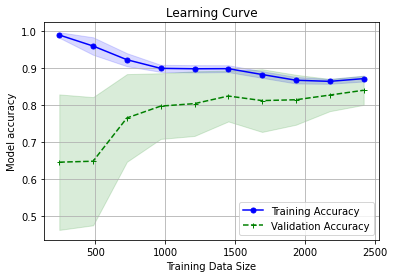

In [113]:
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', solver='lbfgs', random_state=1, max_iter=10000))
#
# Use learning curve to get training and test scores along with train sizes
#
train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)

#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# TO DO NEXT
Learning Curve >>might need to fix datset. 
Overfit=too complicated > try models ex.random forest. more data, underfit=too simple> add more features



In [114]:
# Score the model on the Testing data
X_test = test.drop(columns = ['target','month', 'date','file_id'])
y_test = test.target
logreg.fit(X_train,y_train)
logreg.score(X_test,y_test)

/Users/Pinku/.pyenv/versions/3.8.6/envs/business_opt_in_agriculture/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.882636655948553

<AxesSubplot:>

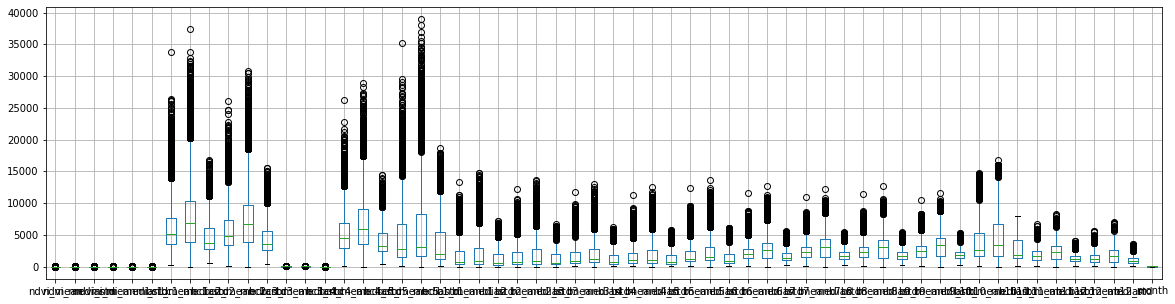

In [115]:
# df3.hist
df2.boxplot(figsize = (20,5))

In [117]:
# from sklearn.preprocessing import StandardScaler

#Robust Scaler

from sklearn.preprocessing import RobustScaler

sc = RobustScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [118]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [119]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([8.24377904e-01, 9.09360552e-02, 6.02286704e-02, 1.62641253e-02,
       2.34493247e-03, 1.69588802e-03, 1.35889935e-03, 6.95881373e-04,
       5.42262239e-04, 4.43292690e-04, 3.52344639e-04, 2.93488427e-04,
       2.00330536e-04, 1.05515698e-04, 4.93310890e-05, 2.22825310e-05,
       1.87804034e-05, 1.49608750e-05, 1.30200448e-05, 9.06644975e-06,
       7.88207880e-06, 5.33396507e-06, 4.81830423e-06, 4.22850784e-06,
       2.78854270e-06, 2.61473248e-06, 1.05702521e-06, 9.62281271e-07,
       7.07034146e-07, 5.62560685e-07, 4.05368459e-07, 2.78812720e-07,
       2.32116468e-07, 2.21559601e-07, 1.65290879e-07, 1.32679210e-07,
       1.27868142e-07, 9.68142152e-08, 7.49968346e-08, 5.98469753e-08,
       4.48117780e-08, 3.65260227e-08, 3.59836596e-08, 3.08289619e-08,
       1.82543361e-08, 1.39873868e-08, 1.18157512e-08, 9.52764207e-09,
       7.17028760e-09, 4.13007368e-09, 2.55599436e-09, 1.99826003e-09,
       3.32863560e-10, 4.94625403e-33, 4.94625403e-33, 4.94625403e-33,
      

In [120]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train_1 = pca.fit_transform(X_train_sc)
X_test_1 = pca.transform(X_test_sc)

In [121]:
# Now we can try using a random forest classification for making predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_1, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test_1)

In [122]:
# Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))

# It can be seen from the output that with only one feature, the random forest algorithm is able to 
# correctly predict X out of Y total instances, resulting in X% accuracy.

[[161  55]
 [206 200]]
Accuracy 0.5803858520900321


In [123]:
pca = PCA(n_components=2)

X_train_2 = pca.fit_transform(X_train_sc)
X_test_2 = pca.transform(X_test_sc)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_2, y_train)

y_pred = classifier.predict(X_test_2)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy',accuracy_score(y_test, y_pred))

[[166  50]
 [186 220]]
Accuracy 0.6205787781350482


In [124]:
# Results when all features (principal components) are used

pca = PCA()
X_train_all = pca.fit_transform(X_train_sc)
X_test_all = pca.transform(X_test_sc)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_all, y_train)

y_pred = classifier.predict(X_test_all)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy',accuracy_score(y_test, y_pred))

[[191  25]
 [125 281]]
Accuracy 0.7588424437299035


In [125]:
from sklearn.neighbors import KNeighborsClassifier
pca = PCA()
X_train_all = pca.fit_transform(X_train_sc)
X_test_all = pca.transform(X_test_sc)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_all, y_train)

y_pred = knn.predict(X_test_all)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy',accuracy_score(y_test, y_pred))

[[209   7]
 [ 52 354]]
Accuracy 0.905144694533762


In [126]:
from sklearn.svm import SVC
pca = PCA()
X_train_all = pca.fit_transform(X_train_sc)
X_test_all = pca.transform(X_test_sc)

svc = SVC(gamma='auto')
svc.fit(X_train_all, y_train)

y_pred = svc.predict(X_test_all)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy',accuracy_score(y_test, y_pred))

[[200  16]
 [ 78 328]]
Accuracy 0.8488745980707395


In [127]:
# Minmax Scaler 
from sklearn.preprocessing import MinMaxScaler

minmax_sc = MinMaxScaler()
X_train_mms = minmax_sc.fit_transform(X_train)
X_test_mms = minmax_sc.transform(X_test)

In [128]:
from sklearn.neighbors import KNeighborsClassifier
pca = PCA()
X_train_all = pca.fit_transform(X_train_mms)
X_test_all = pca.transform(X_test_mms)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_all, y_train)

y_pred = knn.predict(X_test_all)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy',accuracy_score(y_test, y_pred))

[[206  10]
 [ 52 354]]
Accuracy 0.9003215434083601
